In [1]:
import matplotlib.pyplot as plt

# Matplotlib architechture

From https://www.aosabook.org/en/matplotlib.html
> The top-level matplotlib object that contains and manages all of the elements in a given graphic is called the Figure. One of the core architectural tasks matplotlib must solve is implementing a framework for representing and manipulating the Figure that is segregated from the act of rendering the Figure to a user interface window or hardcopy.

> The architecture to accomplish this is logically separated into three layers, which can be viewed as a stack. Each layer that sits above another layer knows how to talk to the layer below it, but the lower layer is not aware of the layers above it. The three layers from bottom to top are: backend, artist, and scripting.

1. Scripting layer (pyplot)

2. Artist layer (Artist)

3. Backend layer (FigureCanvas, Rendered, Event)

## Backend Layer

Implements interfaces `matplotlib.backend_bases.FigureCanvas`, :

- `FigureCanvas` surface onto which the figure is drawn.
- `Renderer` does the drawing, knows how to draw onto `FigureCanvas` (e.g. "the paintbrush").
- `Event` handles user inputs such as keyboard and mouse events.


## Artist Layer

Where much of the heavy lifting happens, the `Artist` is the object that knows how to tamke the `Renderer`
and draw on the `FigureCanvas`.

Everything you see in a matplotlib `Figure` is an `Artist` instance; the title, the lines, the tick labels,
the images, and so on all correspond to individual Artist instances.

The base class is `matplotlib.artist.Artist`, which contains attributes that every Artist shares

Types of `Artists`
1. **Primitive**: represent the kinds of objects you see in a plot
  - `Line2D`
  - `Rectangle`
  - `Circle`
  - `Text`
2. **Composite**: collections of artists
  - `Axis`
  - `Tick`
  - `Axes`: where most of the matplotlib API plotting methods are defined. Contains most of the graphical elements that make up the background of the plot . Contains numerous helper methods that create primitive artists and add them to the Axes instance.
  - `Figure`: contains one or more composite `Axe`s and the background of the Figure is a primitive Rectangle

Composite hirearchy example:
- `Figure`
  - `Axes`
    - `Axis`
      - `XAxis`
      - `YAxis`
      - `Tick`

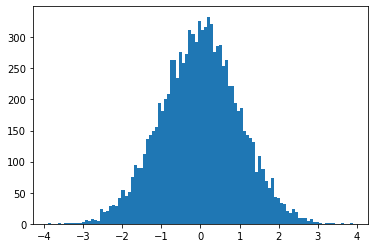

In [2]:
# Import the FigureCanvas from the backend of your choice
#  and attach the Figure artist to it.
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

# Import the numpy library to generate the random numbers.
import numpy as np
x = np.random.randn(10000)

# Now use a figure method to create an Axes artist; the Axes artist is
#  added automatically to the figure container fig.axes.
# Here "111" is from the MATLAB convention: create a grid with 1 row and 1
#  column, and use the first cell in that grid for the location of the new
#  Axes.
ax = fig.add_subplot(111)

# Call the Axes method hist to generate the histogram; hist creates a
#  sequence of Rectangle artists for each histogram bar and adds them
#  to the Axes contai
ax.hist(x, 100)

# Create a dummy figure just so we can use its manager to display "fig"
dummy = plt.figure()
new_manager = dummy.canvas.manager
new_manager.canvas.figure = fig

## Scripting Layer
Lighter scripting interface, compromised mainly of `pyplot`
>`pyplot`: stateful interface handling much of the boilerplate for creating figures and axes and connecting them to the backend of your choice, and maintains module-level internal data structures representing the current figure and axes to which to direct plotting commands.

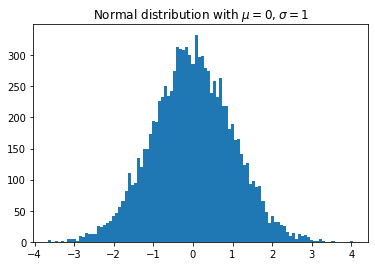

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

Dissecting the above
Let's dissect the important lines in the script to see how this internal state is managed.

#### `import matplotlib.pyplot as plt`: 
When the pyplot module is loaded, it parses a local configuration file
in which the user states, among many other things, their preference for a default backend.

#### `plt.hist(x, 100)` `pyplot` 
Checks its internal data structures to see if there is a current `Figure` instance.
If so, extract its current `Axes` and direct plotting to `Axes.hist`. If there is none, this creates a `Figure`
and `Axes` for you, then again directs plotting to `Axes.hist`.

#### `plt.title(r'Normal distribution with $\mu=0, \sigma=1$')`
Look for internal `Figure` and `Axes`, then directs the call to the existing `Axes`' `Axes.set_title`.

#### `plt.show()`
Force `Figure` to render
    